# スペクトログラムの3次元表示

# 5月1, 2, 8の作業内容記載

---

In [1]:
import IPython.display as ipd
from scipy.io import wavfile
import os
import numpy as np
#from scipy import signal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns
import cv2
from PIL import Image
from IPython.display import HTML , Audio 
from matplotlib.animation import FuncAnimation
import math
np.set_printoptions(suppress=True)
matplotlib.rcParams['animation.embed_limit']=80.0

## スペクトログラム画像が保存されているパスの指定, 画像ファイルのリスト表示

In [2]:
# スペクトログラムの画像へのパスを指定
path = 'mel_spec/'
csv_files = os.listdir(path)
join=[]

# mel-スペクトログラムのpng画像のリストを表示
for i in range(len(csv_files)):
    if ".png" == os.path.splitext(csv_files[i])[1]: ## os.path.splitext()[1]で拡張子を取得
        join.append(csv_files[i])
join = sorted(join)
print(join)

['149822_mel_spec.png', '2192301 S5IP_mel_spec.png', '2469380_mel_spec.png', '2664020_mel_spec.png', '3087923_mel_spec.png', '3137925_mel_spec.png', '4543071_mel_spec.png', '5694327_mel_spec.png', '6117612 S11IP_mel_spec.png', '6548838 S7IP_mel_spec.png', '6702179 S8IP_mel_spec.png', '6705671_mel_spec.png', '7045479 S13IP_mel_spec.png', '7260856 S6IP_mel_spec.png', '7309953 S10IP_mel_spec.png', '7416697 S4IP_mel_spec.png', '7685790 S9IP_mel_spec.png', '7725391_mel_spec.png', '7752254_mel_spec.png', '8028767 S12IP_mel_spec.png', 'S14IP 7897151_mel_spec.png', 'S15IP 3432138_mel_spec.png', 'S16IP 1639292_mel_spec.png', 'S17IP 7067156_mel_spec.png', 'S18IP 7892062_mel_spec.png', 'S20IP-8288358_mel_spec.png', 'S21IP-32502_mel_spec.png', 'S22IP-5627886_mel_spec.png', 'S23IP-6287348_mel_spec.png', 'normal_10_mel_spec.png', 'normal_1_mel_spec.png', 'normal_2_mel_spec.png', 'normal_3_mel_spec.png', 'normal_4_mel_spec.png', 'normal_5_mel_spec.png', 'normal_6_mel_spec.png', 'normal_7_mel_spec.png

## 画像ファイルの指定, オプション設定, 画像の読み込み等

In [ ]:
# ファイルのパスを指定します。
train_audio_path = 'audio/'
disease = 'normal' #受診者の肺音の症状


# 初期設定値
file_name = "normal_10_mel_spec.png" #png ファイル名
wav_name = 'normal_10.WAV' #wavファイル名
save_flag = 0 #スペクトログラム画像の保存　0:保存しない　1:保存
axis = 0 #軸とサイズ　0:軸なし、サイズ(1584, 256)　1:軸あり、サイズ比(24, 4)　2:軸なし、サイズデフォルト　3:軸あり、サイズデフォルト
c_map = 'jet' # 'brg' 'rainbow' 'jet' 'autumn' 'gnuplot'
freq_range = 256 # 表示する画像の縦比
time_range = 1584 # 表示する画像の横比
plot_range = int(time_range/4) # 表示する画像の横軸範囲


name = wav_name[0:-4] #拡張子抜きファイル名

# 音声データの読み込み
# sample_rate:サンプリング周波数, sample:サンプルwavデータ
sample_rate, samples = wavfile.read(train_audio_path + wav_name)
# Player 実行 モノラルではなくステレオなので配列の向きの違いから転置の必要あり

# 表示する画像の読み込み・音声再生
imcv = cv2.imread(path+file_name)
im_gray = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray/"+file_name, im_gray)
ipd.Audio(samples.T, rate=sample_rate)

## 音声ファイルの詳細情報表示

In [9]:
N = samples.shape[0] # 標本データ数(要素数)を返す
L = len(samples)/sample_rate # 時間(長さ)の算出
plot_time = np.linspace(0, L, N) # グラフ描画のための時間軸の生成

print("サンプリング周波数："+str(sample_rate))
print("標本数："+str(N))
print("総時間："+str(L))
print("データの型："+str(samples.dtype))
print("画像比率："+str(im_gray.shape))
#print(im_pad.dtype)

サンプリング周波数：10240
標本数：153000
総時間：14.94140625
データの型：int16
画像比率：(256, 1584)


## 3Dグラフ：時間軸の生成

In [10]:
# 軸の範囲
im_gray = im_gray[256-freq_range:256,1584-time_range:1584]
print(im_gray.shape)

# 0のパディング
im_pad = np.zeros((freq_range,plot_range))
print(im_pad.shape)
im_gray = np.concatenate([im_pad, im_gray], 1)
im_gray = im_gray.astype(np.uint8)
print(im_gray.shape)

# 周波数軸の反転
im_reverse = np.flipud(im_gray)


# 時間軸の生成
time = np.linspace(-plot_range*(L/time_range), L, time_range+plot_range)
time_range = time_range+plot_range
print(time_range)

# 時間軸のメッシュ作成
t = time
for i in range(freq_range-1):
    t = np.row_stack((t,time))
print('軸の形状'+str(t.shape))

#t = np.concatenate([im_pad, t], 1)

(256, 1584)
(256, 396)
(256, 1980)
1980
軸の形状(256, 1980)


## 3Dグラフ：周波数軸の対数スケール変換

In [11]:
# 表示周波数軸の対数変換
ati = (freq_range/4)
atix = ati*16
print(ati)
print(atix)
s = atix/2
list_axis = []
list_axis.append(0)
for i in range(4):
    list_axis.append(int(s*2**i))
    
# 表示する周波数のリスト
list_axis

64.0
1024.0


[0, 512, 1024, 2048, 4096]

In [12]:
# 表示するmel-周波数軸の生成
mel_axis = np.array(list_axis) #mel-スペクトログラムの周波数軸スケール(mel)

#lin_axis = np.linspace(0, sample_rate/2, 7)
#mel_log_axis = np.array([0,64,128,256,512,1024,2048])

# 対応する線形周波数軸の生成
lin_axis = np.linspace(0, sample_rate/2, 5) #0~ナイキスト周波数を5分割
lin_axis=lin_axis.astype(int)

## 3Dグラフ：周波数軸の生成

In [13]:
# 周波数軸の生成
hz = np.linspace(0, 5120, freq_range)
mel_scale = hz
for i in range(time_range-1):
    mel_scale = np.column_stack((mel_scale,hz))
print('軸の形状'+str(mel_scale.shape))

軸の形状(256, 1980)


##  0パディングされたmel-スペクトログラムの表示

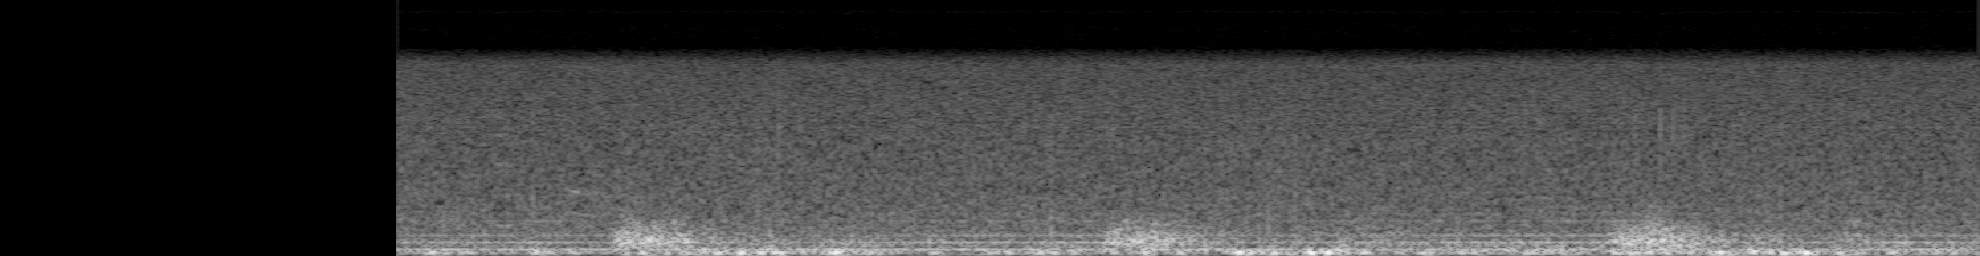

In [14]:
Image.fromarray(im_gray)

----------------

-----

# スペクトログラム全体の3次元グラフ

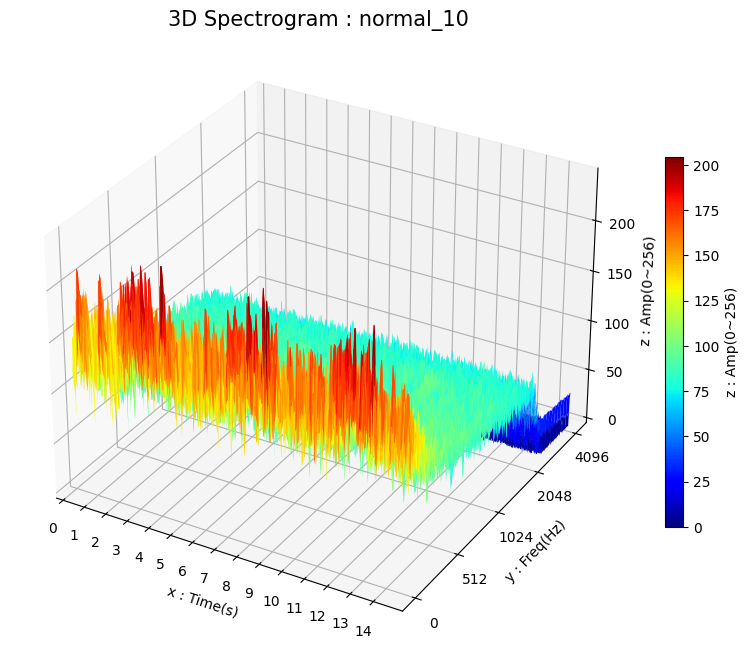

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# 表示範囲のメッシュ取り出し
x = t[:,plot_range:time_range]
y = mel_scale[:,plot_range:time_range]

# 波面のプロット
color = ax.plot_surface(x, y, im_reverse[:,plot_range:time_range], cmap = c_map, rstride=5, cstride=5)

# 軸ラベルの表示
ax.set_xlabel('x : Time(s)')
ax.set_ylabel('y : Freq(Hz)')
ax.set_zlabel('z : Amp(0~256)')

# x軸の表示範囲
ax.set_xlim(0, L)

# 軸の表示
ax.set_yticks(lin_axis,mel_axis)
ax.set_xticks(np.arange(0, L, 1.0))

# タイトル
ax.set_title("3D Spectrogram : "+name, size=15)
cbar = plt.colorbar(color, shrink=0.6, label='z : Amp(0~256)')
plt.show()

# 保存オプション
if save_flag == 1:
    fig.savefig('Animation/'+disease+'/times/freq_'+c_map+'_'+name+'.png')

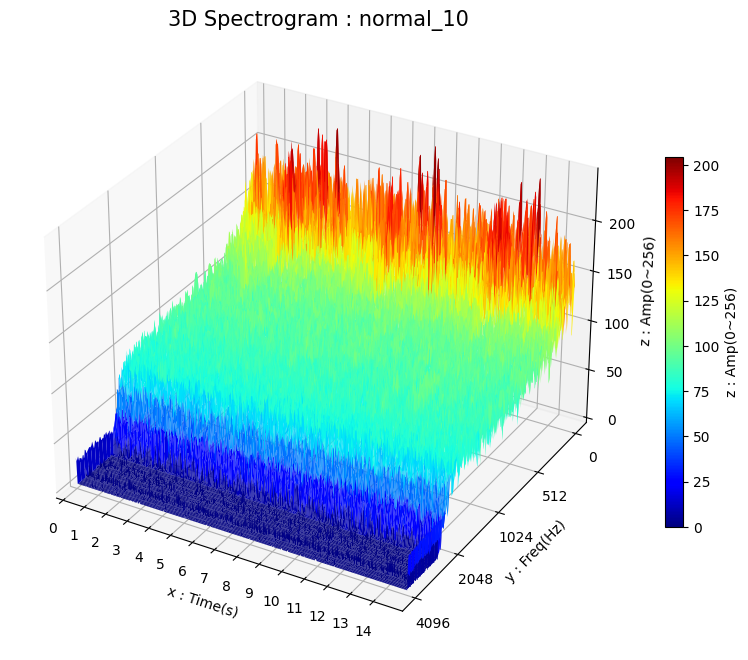

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = t[:,plot_range:time_range]
y = mel_scale[:,plot_range:time_range]

color = ax.plot_surface(x, y, im_gray[:,plot_range:time_range], cmap = c_map , rstride=5, cstride=5)

ax.set_xlabel('x : Time(s)')
ax.set_ylabel('y : Freq(Hz)')
ax.set_zlabel('z : Amp(0~256)')

ax.set_xlim(0, L)#time

ax.set_yticks(lin_axis,np.flipud(mel_axis))
ax.set_xticks(np.arange(0, L, 1.0))

ax.set_title("3D Spectrogram : "+name, size=15)
cbar = plt.colorbar(color, shrink=0.6, label='z : Amp(0~256)')
plt.show()

if save_flag==1:
    fig.savefig('Animation/'+disease+'/times/freq_reverse_'+c_map+'_'+name+'.png')

# 3次元グラフの描画
---

## 周波数軸前面アニメーション

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# count : 描画のコマ数
count=1

# アニメーションは時間を少しずつずらして表示する。b：ずらすサンプル数（整数）約0.2秒を設定
b=math.floor(0.2/(L/(time_range-plot_range)))
print(b)


# アニメーション関数
def ani_plot(i):
    
    # プロットのクリア
    plt.cla()
    
    # 描画範囲のメッシュ取り出し
    x = t[:,i*b:plot_range+i*b]
    y = mel_scale[:,i*b:plot_range+i*b]
    
    # グラフの軸ラベル
    ax.set_xlabel('x : Time(s)')
    ax.set_ylabel('y : Freq(Hz)')
    ax.set_zlabel('z : Amp(0~256)')
    
    # y軸の表示
    ax.set_yticks(lin_axis,mel_axis)
    
    # z軸の表示範囲
    ax.set_zlim(0, 180)
    
    # タイトルの表示
    ax.set_title("3D Spectrogram : "+name, size=15)
    
    # 波面のプロット
    color = ax.plot_surface(x, y, im_reverse[:,i*b:plot_range+i*b], cmap = c_map , rstride=5, cstride=5)


# アニメーションのフレーム数を設定    
for j in range(time_range):
    if plot_range+j*b>=time_range:
        break
    count+=1

# アニメーション関数の呼び出し
ani = FuncAnimation(fig=fig, func=ani_plot, interval=200, frames=count)

# アニメーションをHTMLに変換
s = ani.to_jshtml()

# 保存オプション

freq_path = 'Animation/'+disease+'/times/freq_'+c_map+'_'+name+'_animation.html'
if save_flag == 1:
    with open(freq_path, 'w') as f:
        f.write(s)
        
        
# HTML表示
HTML(s)

## 周波数軸背面アニメーション

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

count=1

b=math.floor(0.2/(L/(time_range-plot_range)))
print(b)
    
def ani_plot(i):
    
    plt.cla()        
    x = t[:,i*b:plot_range+i*b]
    y = mel_scale[:,i*b:plot_range+i*b]
    ax.set_xlabel('x : Time(s)')
    ax.set_ylabel('y : Freq(Hz)')
    ax.set_zlabel('z : Amp(0~256)')
    ax.set_yticks(lin_axis,np.flipud(mel_axis))
    ax.set_zlim(0, 180)
    ax.set_title("3D Spectrogram : "+name, size=15)
    color = ax.plot_surface(x, y, im_gray[:,i*b:plot_range+i*b], cmap = c_map , rstride=5, cstride=5)    


for j in range(time_range):
    if plot_range + j*b >= time_range:
        break
    count+=1


ani = FuncAnimation(fig=fig, func=ani_plot, interval=200, frames=count)
s = ani.to_jshtml()

freq_reverse_path = 'Animation/'+disease+'/times/freq_reverse_'+c_map+'_'+name+'_animation.html'
if save_flag == 1:
    with open(freq_reverse_path, 'w') as f:
        f.write(s)
        
HTML(s)

## 音声のHTMLファイル埋め込み

In [ ]:
# HTML Table の生成
html = "<table><tr><th>name</th><th>sounds</th></tr>"

# Audio オブジェクトの生成
audio_obj = Audio(data=samples.T, rate=sample_rate)

    # Audio オブジェクトの埋め込み
html += """
<tr><td>%s</td><td>
    <audio controls>
        <source src="%s" type="audio/wav">
    </audio></td>
</tr>
""" % (name, audio_obj.src_attr())

# Table を閉じる
html += "</table>"

sound_path = 'Animation/'+disease+'/times/freq_'+c_map+'_'+name+'_sound.html'
if save_flag == 1:
    with open(sound_path, 'w') as f:
        f.write(html)

## HTMLファイルの連結

In [ ]:
from bs4 import BeautifulSoup

def bind_html(html_path_list: list) -> str:
    '''複数のhtmlを順番に結合する

    Args:
        html_path_list ([str]): htmlファイルのpathリスト

    Attributes:
        pure_bound_html (str): 純粋にhtmlを文字列として 結合したもの
        bound_html (str): pure_bound_htmlから結合部分を 取り除いたもの

    Returns:
        str
    '''
    soup_list = []
    for html_path in html_path_list:
        with open(html_path) as f:
            soup_list.append(BeautifulSoup(f.read(), 'lxml'))
    pure_bound_html = ''.join([soup.prettify() for soup in soup_list])
    bound_html = pure_bound_html.replace('</html>\n<html>\n', '')
    return bound_html

In [ ]:
html_path_list = [freq_path, sound_path]

if save_flag==1:
    bound_html = bind_html(html_path_list)
    with open('Animation/'+disease+'/times/freq_'+c_map+'_'+name+'_All.html', 'w') as f:
        f.write(bound_html)

In [ ]:
html_path_list = [freq_reverse_path, sound_path]

if save_flag==1:
    bound_html = bind_html(html_path_list)
    with open('Animation/'+disease+'/times/freq_reverse_'+c_map+'_'+name+'_All.html', 'w') as f:
        f.write(bound_html)

---
## 5/1
## 軸のスケール変換処理のコーディング作業/3Dspec.ipynbのテスト実行

従来の3次元グラフの表示では1584×256ピクセルのスペクトログラムの画像をグレースケールに変換して読み込んだデータを用いていた.  
従来の3Dグラフでは時間軸は1584ピクセルを時間軸に変換していた。これはデータの総時間がわかっているため総時間を1584で割ることで時間軸を算出することができる。  
同様に周波数軸を作成するために、256をスケール変換する必要がある。元のスペクトログラムの周波数の最大値はサンプリング周波数の1/2である5120である。  
これはナイキスト定理に基づく。256を5120で割ることで周波数軸を算出することができる。  
上記で示した周波数軸を作成する処理を実現するためのコーディング作業を実施した。  
log,mel,mel-logのスペクトログラムでは通常の線形の一定間隔の軸ではないため、特殊な周波数軸変換が必要になる。  
どのスペクトログラムでも軸を作成できるように個別に処理を実行できるコードを作成した。  
matplotlibの軸のスケール変換のメソッドが存在するが、3Dグラフのメソッドには不完全な部分が多いため、エラーを起こしたり軸が正しく表示されない現象が確認された。  
上記の事項は3Dspec.ipynbをテスト実行する事で確認された。

---
##  5/2
## 3Dspec.ipynbの編集/3Dスペクトログラム画像の作成

3Dグラフの表示にはX,Y,Zそれぞれの軸に対して目盛の値が格納された配列を作成しなければならない。  

X軸は時間軸のため、1584ピクセル分である1584個の要素を持つ配列を定義する。  
格納する値は最小値は0,最大値は肺音データの秒数として、肺音データの秒数を1584で割った値をメモリの刻み幅として表示用配列に格納する。  
なおこの処理は3Dグラフ：時間軸の生成部のセルにて実行する。  

Y軸は周波数軸のため、256ピクセル分である256個の要素を持つ配列を定義する。  
格納する値は最小値0,最大値はナイキスト周波数の5120として、5120を5で割った値をメモリの刻み幅として表示用配列に格納する。  
ただしこれは線形の周波数軸であり、今回はmel-スペクトログラムの周波数軸を作成する。  
そのためmelフィルタに合わせて周波数軸の刻み幅を低周波は広く高周波は狭くする必要がある。  
メルフィルタに関してはlibrosaの内部処理であるためここでは詳細な数式は記載しない。  
変換の詳細は「3Dグラフ：周波数軸の対数スケール変換」のコードを参照。  

Z軸は音の振幅の大きさだが、これは明確な単位は必要としないため現状の0~256にスケーリングされた範囲の値をそのまま採用する。  

上記の処理後に加えて、3Dのグラフでは軸を作成する際にメッシュの形を要求するため、X軸とY軸はそれぞれ256×1584の配列にしなければならない。  
そのためcolumn_stackとrow_stackメソッドを用いて、軸の一次元配列を積み重ねることで適した形に変形する。

今回は一番理解の支援に有用であると考えられるmel-スペクトログラムのみに焦点を当てているが、その他のスペクトログラムである  
log周波数軸やmel-log周波数軸の変換コードもコメントアウトにて記載しているため、必要に応じて使用する。  

最後に周波数軸が3Dグラフにおける奥行きになるが、高周波が手前に表示させるか奥側に表示させるかで、見えやすさが異なる。  
周波数軸を反転させた表示用配列を用意することで2パターンの3次元グラフを生成できるようにする。

以上の処理を実装するため本ipynbファイルでコーディング作業を実施した。

またテストとして健常者、間質性肺炎患者で数個の3Dスペクトログラム画像を作成した。

---
## 5/8
## アニメーション生成コードの作成/3Dspec.ipynbの実行

全時間の3Dのスペクトログラム画像を生成するためにmatplotlibのplot_surfaceメソッドを利用する。  
低周波数が手前に表示されるim_reverseと高周波数が手前に表示されるim_grayを用いて2通りの3Dスペクトログラム画像を生成する。  
カラーマップを設定することで振幅の強さによってグラフの色が変化させることができる。  
今回は視覚的に捻発音を理解できると想定されるカラーマップを複数候補として用意した。下記に候補のカラーマップを示す。  
'jet','brg' 'rainbow' 'jet' 'autumn' 'gnuplot'  
10日に進捗報告をするためのグラフとして今回はjetのカラーマップを採用した。  

3Dのアニメーション画像も生成するために、表示する3Dグラフを時間軸の範囲を限定しつつ、ずらして表示させることでアニメーション画像にした。
これを実現するためにmetplotlibのfuncanimationメソッドを利用した。
約0.2秒ごとにグラフをずらすように初期設定をしたが、任意の設定で変更可能なようにコーディングを実施した。
また初期の表示は変化がない状態にするために、元のスペクトログラム画像に全ての要素が0の配列を連結（パディング）した。
これにより再生した時に手前側から音の変化を見ることができるようにした。

上記アニメーションはHTMLに埋め込むことでブラウザで再生するように設計した。
また簡易に音と同時再生を実現するため、音を埋め込んだHTMLファイルと連結して一つのHTMLファイルとするように設計した。

以上を以上の処理を実装するため本ipynbファイルでコーディング作業を実施した。

完成したコードを被験者データ：7260856 S6IP、S16IP 1639292、S17IP 7067156、S20IP-8288358、健常者1、健常者2、健常者4、健常者10のスペクトログラムで実行し、3Dのスペクトログラム画像とアニメーションを生成した。